In [81]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

# Predicting an Astrometric signal

## Calculating velocity of the star

Proper motion and distance are given

In [82]:
proper_motion_mas_yr = 50
proper_motion_as_yr = proper_motion_mas_yr * 0.001
print('The proper motion is:',proper_motion_as_yr,'as/year ')

D = 50
print('The distance to the star is',D,'pc')

The proper motion is: 0.05 as/year 
The distance to the star is 50 pc


Use the equation $v_T=4.74D\mu$

In [83]:
v_star_kms = 4.74*proper_motion_as_yr*D
v_star_AUyear = v_star_kms * (1/1.496e+8) * (3.154e+7)
print('The velocity of the star is',v_star_kms,'km/s or',v_star_AUyear,'AU/years')

The velocity of the star is 11.850000000000001 km/s or 2.4983221925133696 AU/years


Setting the timescale as 4.2 years 

In [84]:
timescale = 4.2

Setting the masses for earth and the sun in solar units for later calculations

In [85]:
m_sun = 1 
m_earth = 3.0027e-6

## Simulation WITHOUT planet 

In [86]:
sim = rebound.Simulation()                                # starting simulation named sim 

sim.units=["msun","AU","year"]                            # setting units of sim 
print('The units for this simulation are:',sim.units)     # printing units of sim 

sim.add(m=1)                                              # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                            # add Earth in a 1 AU circular orbit 

sim.add(m=1, x = 1.031e7, vy = v_star_AUyear, z=2)             # add a hypothetical star 50 pc away with calculated velocity (guessed its mass)

The units for this simulation are: {'length': 'au', 'mass': 'msun', 'time': 'year'}


Creating arrays with a length of 50 to hold specific values

In [87]:
n=50

# x,y and z positions of the sun, earth and star 
x_pos_sun, y_pos_sun, z_pos_sun  = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_earth, y_pos_earth, z_pos_earth = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_star, y_pos_star, z_pos_star = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x,y and z positions of COM of sun-earth system
x_cm, y_cm, z_cm = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x components of position vectors 
r_COM_x, r_earth_x, r_star_x, r_SE_x, r_SC_x = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# y components of position vectors 
r_COM_y, r_earth_y, r_star_y, r_SE_y,r_SC_y = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# z components of position vectors 
r_COM_z, r_earth_z, r_star_z, r_SE_z, r_SC_z = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# length of porision vectors 
r_COM, r_earth, r_star, r_SE, r_SC = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# right ascension and declination
alpha = np.empty((1,n))
delta = np.empty((1,n))

    
# norm in xy and xyz plane 
r_SE_xy, r_SE_xyz = np.empty((1,n)), np.empty((1,n))

times = np.linspace(0,timescale,num=n)

Creating a for loop to fill the arrays that were created

In [88]:
 for i,t in enumerate(times):
    sim.integrate(t)
    
    # x,y and z positions of the sun
    x_pos_sun[0,i] = sim.particles[0].x
    y_pos_sun[0,i] = sim.particles[0].y
    z_pos_sun[0,i] = sim.particles[0].z
    
    # x,y and z positions of earth 
    x_pos_earth[0,i] = sim.particles[1].x
    y_pos_earth[0,i] = sim.particles[1].y
    z_pos_earth[0,i] = sim.particles[1].z
    
    # x,y and z positions of the star
    x_pos_star[0,i] = sim.particles[2].x
    y_pos_star[0,i] = sim.particles[2].y
    z_pos_star[0,i] = sim.particles[2].z
    
    # earth is the center of the reference frame to find RA and Dec
    #r_star - r_earth 
    r_SE_x[0,j] = x_pos_star[0,j] - x_pos_earth[0,j]
    r_SE_y[0,j] = y_pos_star[0,j] - y_pos_earth[0,j]
    r_SE_z[0,j] = z_pos_star[0,j] - z_pos_earth[0,j]
    #print('The vector compponents of r_star - r_earth are (',r_SE_x_wp,',',r_SE_y_wp,',',r_SE_z_wp,')')

    # calculating the lengths of vectors 
    r_SE_xy[0,j]  = np.sqrt(r_SE_x[0,j]**2 + r_SE_y[0,j]**2)
    r_SE_xyz[0,j] = np.sqrt(r_SE_x[0,j]**2 + r_SE_y[0,j]**2 + r_SE_z[0,j]**2)
    
    # calculating RA and Dec
    alpha[0,j] = (np.arctan(r_SE_y[0,j]/r_SE_x[0,j]))*1e6
    delta[0,j] = (np.arccos(r_SE_xy[0,j]/r_SE_xyz[0,j]))*1e6

Comment/ un-comment speficic lines depending on what arrays you want printed out 

In [89]:
#print('x-position of sun:', x_pos_sun)
#print('y-position of sun:', y_pos_sun)

#print('x-position of earth:', x_pos_earth)
#print('y-position of earth:', y_pos_earth)

#print('x-position of star:', x_pos_star)
#print('y-position of star:', y_pos_star)

#print('xcm of sun earth system:', x_cm)
#print('ycm of sun earth system:', y_cm)

#print('r_COM :', r_COM)
#print('r_earth :', r_earth)
#print('r_star :', r_star)
#print('r_SE :', r_SE)
#print('r_SC :', r_SC)

#print('Values of RA are:',alpha)
#print('Values of Dec are:',delta)

Creating a plot for the x and y positions of the objects 

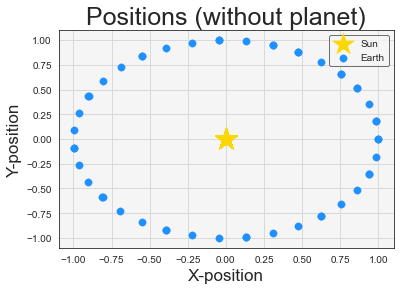

In [90]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
plt.scatter(x_pos_sun, y_pos_sun, color='gold', label='Sun', s=550,marker='*') 
plt.scatter(x_pos_earth, y_pos_earth, color='dodgerblue', label='Earth', s=55) 
#plt.scatter(x_pos_star, y_pos_star, color='darkorange', label='Star', s=55, marker='*') 

# setting titles
plt.title('Positions (without planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show()  

## Simulation WITH planet

In [91]:
sim_wp = rebound.Simulation()                                                # create a simulation called sim_wp 
sim_wp.units=["msun","AU","year"]                                            # setting the units for sim_wpm
print('The units for sim are:',sim_wp.units)                                 # printing the units for sim_wp

sim_wp.add(m=1)                                                              # add Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                            # add Earth in a 1 AU circular orbit 

sim_wp.add(m=1, x = 1.031e7, vy=v_star_AUyear, z = 200)                          # add a hypothetical star 50 pc away with calculated mass (guessed its mass)

sim_wp.add(m = 0.00477294, a = 0.6, e = 0.2, primary = sim_wp.particles[2])  # add planet from figure 3.1 caption and have it orbit the star 

The units for sim are: {'length': 'au', 'mass': 'msun', 'time': 'year'}


Creating arrays to hold data 

In [92]:
# x,y and z positions
x_pos_sun_wp, y_pos_sun_wp, z_pos_sun_wp  = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))       # sun
x_pos_earth_wp, y_pos_earth_wp, z_pos_earth_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))  # earth 
x_pos_star_wp, y_pos_star_wp, z_pos_star_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))     # star 
x_pos_planet, y_pos_planet, z_pos_planet = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))        # planet 

# x,y and z positions of COM of sun-earth system
x_cm_wp, y_cm_wp, z_cm_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x,y,z components of r_star - r_ earth 
r_SE_x_wp, r_SE_y_wp, r_SE_z_wp =np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x,y,z component of r_star - r_com
r_SC_x_wp, r_SC_y_wp, r_SC_z_wp =  np.empty((1,n)),  np.empty((1,n)),  np.empty((1,n))

# right ascension and declination
alpha_wp = np.empty((1,n))
delta_wp = np.empty((1,n))

# norm in xy and xyz plane 
r_SE_xy_wp, r_SE_xyz_wp = np.empty((1,n)), np.empty((1,n))
    
times_wp = np.linspace(0,timescale,num=n)

Filling arrays with data using a for loop

In [93]:
for j,t_wp in enumerate(times_wp):
    sim_wp.integrate(t_wp)
    
    # x,y and z positions of the sun
    x_pos_sun_wp[0,j] = sim_wp.particles[0].x
    y_pos_sun_wp[0,j] = sim_wp.particles[0].y
    z_pos_sun_wp[0,j] = sim_wp.particles[0].z
    
    # x,y and z positions of earth 
    x_pos_earth_wp[0,j] = sim_wp.particles[1].x
    y_pos_earth_wp[0,j] = sim_wp.particles[1].y
    z_pos_earth_wp[0,j] = sim_wp.particles[1].z
    
    # x,y and z positions of the star
    x_pos_star_wp[0,j] = sim_wp.particles[2].x
    y_pos_star_wp[0,j] = sim_wp.particles[2].y
    z_pos_star_wp[0,j] = sim_wp.particles[2].z
    
    # x,y and z positions of the planet
    x_pos_planet[0,j] = sim_wp.particles[3].x
    y_pos_planet[0,j] = sim_wp.particles[3].y
    z_pos_planet[0,j] = sim_wp.particles[3].z
    
    # x,y and z positions of COM of sun-earth system
    x_cm_wp[0,j] = (sim_wp.particles[0].x*m_sun+ sim_wp.particles[1].x*m_earth)/(m_sun+m_earth)
    y_cm_wp[0,j] = (sim_wp.particles[0].y*m_sun+ sim_wp.particles[1].y*m_earth)/(m_sun+m_earth)
    z_cm_wp[0,j] = (sim_wp.particles[0].z*m_sun+ sim_wp.particles[1].z*m_earth)/(m_sun+m_earth)
    
    #r_star - r_earth 
    r_SE_x_wp[0,j] = x_pos_star_wp[0,j] - x_pos_earth_wp[0,j]
    r_SE_y_wp[0,j] = y_pos_star_wp[0,j] - y_pos_earth_wp[0,j]
    r_SE_z_wp[0,j] = z_pos_star_wp[0,j] - z_pos_earth_wp[0,j]
    #print('The vector compponents of r_star - r_earth are (',r_SE_x_wp,',',r_SE_y_wp,',',r_SE_z_wp,')')

    # calculating the lengths of vectors needed for RA and Dec
    r_SE_xy_wp[0,j]  = np.sqrt(r_SE_x_wp[0,j]**2 + r_SE_y_wp[0,j]**2)
    r_SE_xyz_wp[0,j] = np.sqrt(r_SE_x_wp[0,j]**2 + r_SE_y_wp[0,j]**2 + r_SE_z_wp[0,j]**2)
    
    #r_star - r_COM
    r_SC_x_wp[0,j] = x_pos_star_wp[0,j] - x_cm_wp[0,j]
    r_SC_y_wp[0,j] = y_pos_star_wp[0,j] - y_cm_wp[0,j]
    r_SC_z_wp[0,j] = z_pos_star_wp[0,j] - z_cm_wp[0,j]
    
    # calculating RA and Dec
    alpha_wp[0,j] = (np.arctan(r_SE_y_wp[0,j]/r_SE_x_wp[0,j]))*1e6
    delta_wp[0,j] = (np.arccos(r_SE_xy_wp[0,j]/r_SE_xyz_wp[0,j]))*1e6

Printing the values of the arrays 

In [94]:
#print('x-position of sun:', x_pos_sun_wp)
#print('y-position of sun:', y_pos_sun_wp)

#print('x-position of earth:', x_pos_earth_wp)
#print('y-position of earth:', y_pos_earth_wp)

#print('x-position of star:', x_pos_star_wp)
#print('y-position of star:', y_pos_star_wp)

print('The x-positions of the planet are:',x_pos_planet)
print('The y-positions of the planet are:',y_pos_planet)
print('The z-positions of the planet are:',z_pos_planet)

#print('xcm of sun earth system:', x_cm_wp)
#print('ycm of sun earth system:', y_cm_wp)

#print('Values of RA are:',alpha_wp)
#print('Values of Dec are:',delta_wp)

The x-positions of the planet are: [[10310000.48       10310000.00956005 10309999.42270178 10309999.31003947
  10309999.72959223 10310000.38032311 10310000.28401254 10309999.61973074
  10309999.28933954 10309999.50029039 10310000.1365007  10310000.45956269
  10309999.88210843 10309999.36178638 10309999.34883915 10309999.84976065
  10310000.4478224  10310000.16841783 10309999.52295869 10309999.28696163
  10309999.59332648 10310000.25554372 10310000.40092997 10309999.75985322
  10309999.31836306 10309999.40529018 10309999.97634966 10310000.47861508
  10310000.04274516 10309999.44123332 10309999.30293052 10309999.70002798
  10310000.35777642 10310000.31119083 10309999.64701685 10309999.29294686
  10309999.4786606  10310000.10406248 10310000.4687183  10309999.91481242
  10309999.37590792 10309999.33707679 10309999.81785069 10310000.43360008
  10310000.1996671  10309999.54663893 10309999.28581476 10309999.56784231
  10310000.22595209 10310000.41943981]]
The y-positions of the planet are: [[

Creating a plot for the positions of the objects 

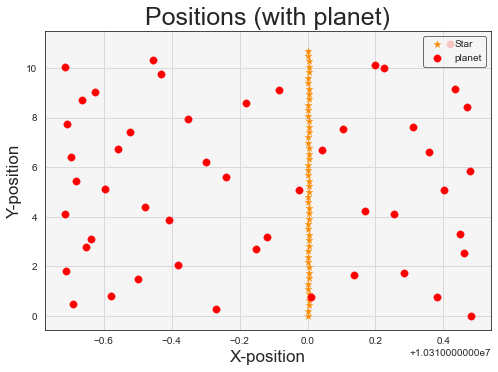

In [100]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
#plt.scatter(x_pos_sun_wp, y_pos_sun_wp, color='gold', label='Sun', s=550,marker='*') 
#plt.scatter(x_pos_earth_wp, y_pos_earth_wp, color='dodgerblue', label='Earth', s=55) 
plt.scatter(x_pos_star_wp, y_pos_star_wp, color='darkorange', label='Star', s=55, marker='*') 
plt.scatter(x_pos_planet, y_pos_planet, color='red', s=55, label='planet') 

# creating titles 
plt.title('Positions (with planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
         
plt.show() 

## Comparing astrometric signals

Creating a plot for the astrometric signals of the simulation with and without the planets to look at their simularities/differences 

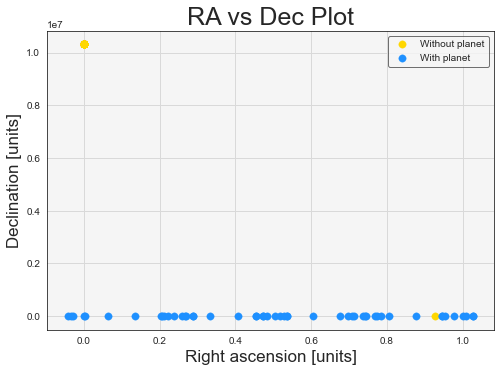

In [96]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot data 
plt.scatter(alpha, delta, color='gold', label='Without planet', s=55) 
plt.scatter(alpha_wp, delta_wp, color='dodgerblue', label='With planet', s=55) 

# set titles 
plt.title('RA vs Dec Plot',fontsize = 25)             
plt.xlabel('Right ascension [units]',fontsize = 17)                     
plt.ylabel('Declination [units]',fontsize = 17)

# plot legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show() 

## Reproducing astrometric signal using equations 3.22 and 3.23

Setting variables (random for now)

In [97]:
planets = ['Earth', 'Planet from Figure 3.1']

a = [1,  0.6]           # semi-major axis in units of AU
omega = [2,2]           # argument of perihelion
OMEGA = [2,2]           # longitude of the ascending node 
i = [1.160644,2]         # orbital inclination (rad)

e = [0.0167,0.2]        # ellipticity of the orbit 
E = [2,2]               #eccentricity anomaly 

prop_RA = [1,2]         # proper motion in RA direction
prop_DEC = [1,2]        # proper motion in DEC direction 

# cartesian components of the observer position wrt the solar system barycentre
rx = [1,2]
ry = [2,2] 
rz = [3,2] 

alpha1 = [1,2]
delta1 = [1,2]

parallax = [1,2] 
change_RA = [1,2]
change_DEC = [1,2] 

t1 = 4.2 
t0 = 0

Using a loop to calculate and print the values 

In [98]:
n = len(planets)
print('The number of planets is:',n)
    
j = 0
for j in range(n):
    print('The planet we are calculating for is :', planets[j])
    
    A = a[j]*(math.cos(omega[j])*math.cos(OMEGA[j])-math.sin(omega[j])*math.sin(OMEGA[j])*math.cos(i[j]))
    print('A =',A)
    
    B = a[j]*(math.cos(omega[j])*math.sin(OMEGA[j])+math.sin(omega[j])*math.cos(OMEGA[j])*math.cos(i[j]))
    print('B =',B)
    
    F = a[j]*(-math.sin(omega[j])*math.cos(OMEGA[j])-math.cos(omega[j])*math.sin(OMEGA[j])*math.cos(i[j]))
    print('F =',F)
    
    G = a[j]*(-math.sin(omega[j])*math.sin(OMEGA[j])+math.cos(omega[j])*math.cos(OMEGA[j])*math.cos(i[j]))
    print('G =',G)
    
    X = math.cos(E[j])-e[j]
    print('X =',X)
    
    Y = sqrt(1-e[j]**2)*math.sin(E[j])
    print('Y = ', Y)
    
    PI_RA = rx[j]*math.sin(alpha1[j]) - ry[j]*math.cos(alpha1[j])
    print('PI_RA =',PI_RA)
    
    PI_DEC = (rx[j]*math.cos(alpha1[j])+ry[j]*math.sin(alpha1[j]))*math.sin(delta1[j]) - rz[j]*math.cos(delta1[j])
    print('PI_DEC =',PI_DEC)
    
    three22 = (B*X+G*Y)+change_RA[j]*math.cos(delta1[j])+parallax[j]*PI_RA+prop_RA[j]*(t-t0)
    print('3.22 =',three22)
    
    three23 = ((A*X)+(F*Y))+change_DEC[j] + parallax[j]*PI_DEC + prop_DEC[j]*(t-t0)
    print('3.23 =',three23)

The number of planets is: 2
The planet we are calculating for is : Earth
A = -0.1565162015497247
B = -0.5292883763792944
F = 0.5292883763792944
G = -0.7577671761149258
X = -0.4328468365471424
Y =  0.909170621004163
PI_RA = -0.23913362692838303
PI_DEC = 0.24988863235556402
3.22 = 4.04132982419173
3.23 = 5.99884961690779
The planet we are calculating for is : Planet from Figure 3.1
A = 0.3103544822205427
B = -0.1325584592983651
F = 0.1325584592983651
G = -0.5393336197077429
X = -0.6161468365471424
Y =  0.890925888059458
PI_RA = 2.650888526745648
PI_DEC = 1.7291347986499686
3.22 = 12.4706525716528
3.23 = 13.7851454279417
